# **Machine Learning Full Pipeline on Heart Disease UCI Dataset**

## **1. General Description of the Project:**
This project aims to analyze, predict, and visualize heart disease risks using machine learning. The workflow involves data preprocessing, feature selection, dimensionality reduction (PCA), model training, evaluation, and deployment. Classification models like Logistic Regression, Decision Trees, Random Forest, and SVM will be used, alongside K-Means and Hierarchical Clustering for unsupervised learning.

### **1.1 Objectives:**
- Perform Data Preprocessing & Cleaning (handle missing values, encoding, scaling).
- Apply Dimensionality Reduction (PCA) to retain essential features.
- Implement Feature Selection using statistical methods and ML-based techniques.
- Train Supervised Learning Models (Logistic Regression, Decision Trees, Random Forest, SVM) for classification.
- Apply Unsupervised Learning (K-Means, Hierarchical Clustering) for pattern discovery.
- Optimize Models using Hyperparameter Tuning (GridSearchCV, RandomizedSearchCV).

### **1.2 Tools to be Used:**
- Programming Languages: Python
- Libraries: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, plotly
- Dimensionality Reduction & Feature Selection: PCA, RFE, Chi-Square Test
- Supervised Models: Logistic Regression, Decision Trees, Random Forest, SVM
- Unsupervised Models: K-Means, Hierarchical Clustering
- Model Optimization: GridSearchCV, RandomizedSearchCV

### **1.3 Final Deliverables**
- Cleaned dataset with selected features
- Dimensionality reduction (PCA) results
- Trained supervised and unsupervised models
- Performance evaluation metrics
- Hyperparameter optimized model
- Saved model in .pkl format

## **2. Steps:**

### **2.1 Data Preprocessing & Cleaning**
Steps:
1. Loading the Heart Disease UCI dataset into a Pandas DataFrame.
2. Conducting Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.
3. Handling missing values.
4. Performing data encoding.
5. Standardizing numerical features using StandardScaler.

Deliverable: Cleaned dataset ready for modeling 👌

#### **Import Libraries**

First, we import all necessary libraries for data manipulation, visualization, statistical analysis, and machine learning.

In [84]:
# Numerical and Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Mathematic and Statistics Libraries
import math
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator

# Model Export
import pickle

import warnings
warnings.filterwarnings('ignore')

#### **Color & Style Definitions:**

In [85]:
# Define hex colors
PRIMARY_COLOR = '#1f77b4'
SECONDARY_COLOR = '#124062'
EDGE_COLOR = '#1F1F1F'
GRID_TEXT_COLOR = '#878787'
BACKGROUND_COLOR = '#1F1F1F'

# Set plot style
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = BACKGROUND_COLOR
plt.rcParams['figure.facecolor'] = BACKGROUND_COLOR
plt.rcParams['text.color'] = GRID_TEXT_COLOR
plt.rcParams['axes.labelcolor'] = GRID_TEXT_COLOR
plt.rcParams['xtick.color'] = GRID_TEXT_COLOR
plt.rcParams['ytick.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.alpha'] = 0.3

# Set the Seaborn style
sns.set_style("darkgrid", {
    'axes.facecolor': BACKGROUND_COLOR,
    'figure.facecolor': BACKGROUND_COLOR,
    'axes.edgecolor': EDGE_COLOR,
    'grid.color': GRID_TEXT_COLOR,
    'xtick.color': GRID_TEXT_COLOR,
    'ytick.color': GRID_TEXT_COLOR,
    'text.color': GRID_TEXT_COLOR,
    'axes.labelcolor': GRID_TEXT_COLOR,
    'axes.titlecolor': GRID_TEXT_COLOR,
})

**Table with all the features we have in the dataset with description:**
| Feature            | Description                                              | Type        |
|--------------------|----------------------------------------------------------|-------------|
| `age`              | Age in years                                             | Numerical   |
| `sex`              | Gender (1 = male; 0 = female)                            | Categorical - Nominal |
| `cp`               | Chest pain type (1-4)                                    | Categorical - Nominal |
| `trestbps`         | Resting blood pressure (mm Hg)                           | Numerical |
| `chol`             | Serum cholesterol (mg/dl)                                | Numerical |
| `fbs`              | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)    | Categorical - Nominal |
| `restecg`          | Resting electrocardiographic results (0-2)               | Categorical - Nominal |
| `thalach`          | Maximum heart rate achieved                              | Numerical |
| `exang`            | Exercise induced angina (1 = yes; 0 = no)                |  Categorical - Nominal  |
| `oldpeak`          | ST depression induced by exercise                        | Numerical   |
| `slope`            | Slope of the peak exercise ST segment (1-3)              | Categorical - Nominal |
| `ca`               | Number of major vessels (0-3) colored by fluoroscopy     | Categorical - Ordinal   |
| `thal`             | Thalassemia (3,6,7)                                      | Categorical - Nominal |
| `num`              | Diagnosis of heart disease (0 = no; 1,2,3,4 = yes)       | Categorical - Nominal   |

#### **Loading the dataset**

We load the dataset from .data file and specify its features because the data does not have columns.

In [86]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(r"Instructions & Dataset\heart disease\processed.cleveland.data", header=None, names=column_names, na_values='?')

#### **Exploratory Data Analysis (EDA)**

In [87]:
print(f"Shape of the DataFrame: {df.shape}")

print("\n--- First 5 Rows ---")
df.head()

Shape of the DataFrame: (303, 14)

--- First 5 Rows ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [88]:
# Convert target to binary: 0 = no disease, 1 = disease (This will help the model perform better)
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

In [89]:
print("--- Dataset Info ---")
df.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [90]:
print("--- Summary Statistics ---")
df.describe()

--- Summary Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [91]:
print("--- Check for Missing Values ---\n")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

--- Check for Missing Values ---

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Total missing values: 6


##### **Histogram Distributions for numerical columns**

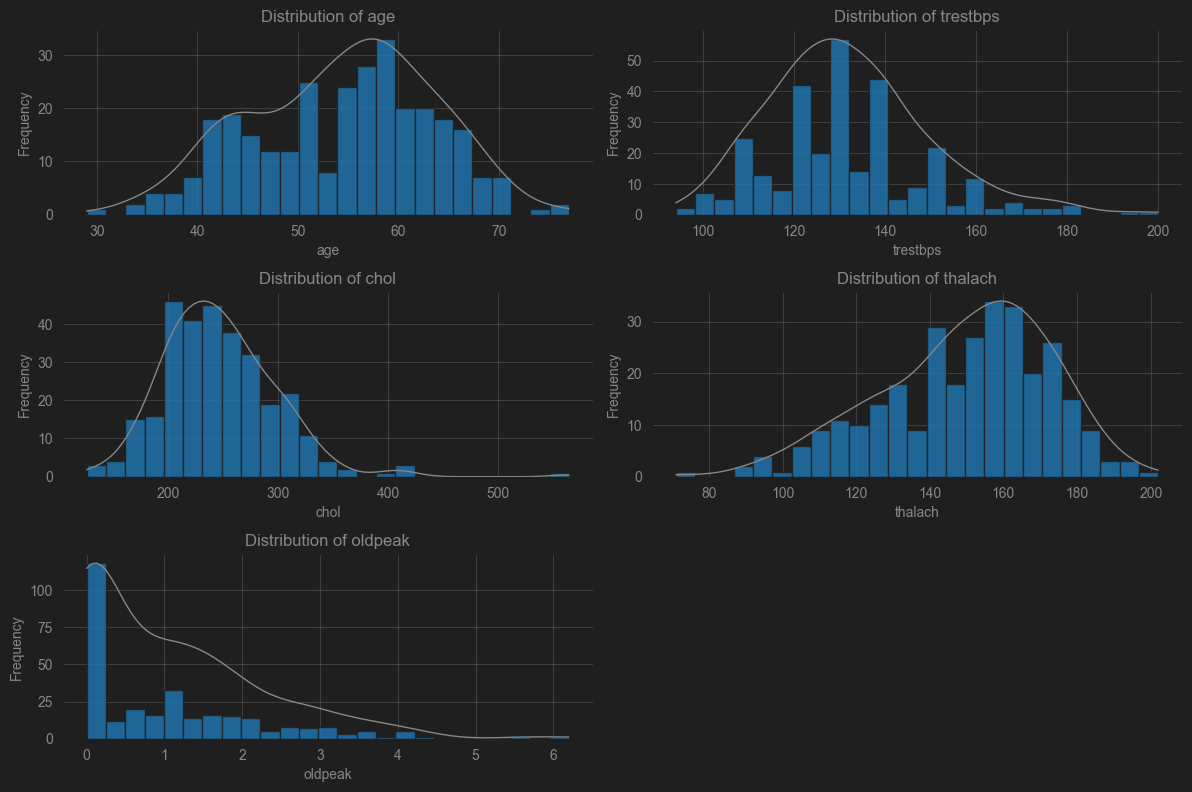

In [92]:
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.close('all')
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    n, bins, patches = axes[i].hist(df[col].dropna(), bins=25, 
                                    color=PRIMARY_COLOR, edgecolor=EDGE_COLOR, alpha=0.8)

    # KDE
    density = stats.gaussian_kde(df[col].dropna())
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)
    y_vals = density(x_vals)

    # Scale KDE to match histogram height
    hist_max = n.max()
    kde_max = y_vals.max()
    scaling_factor = hist_max / kde_max if kde_max > 0 else 1
    axes[i].plot(x_vals, y_vals * scaling_factor, color=GRID_TEXT_COLOR, linewidth=1)

    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True)

fig.delaxes(axes[5])

plt.tight_layout(pad=1)
plt.show()


#### **Bar charts for categorical columns**

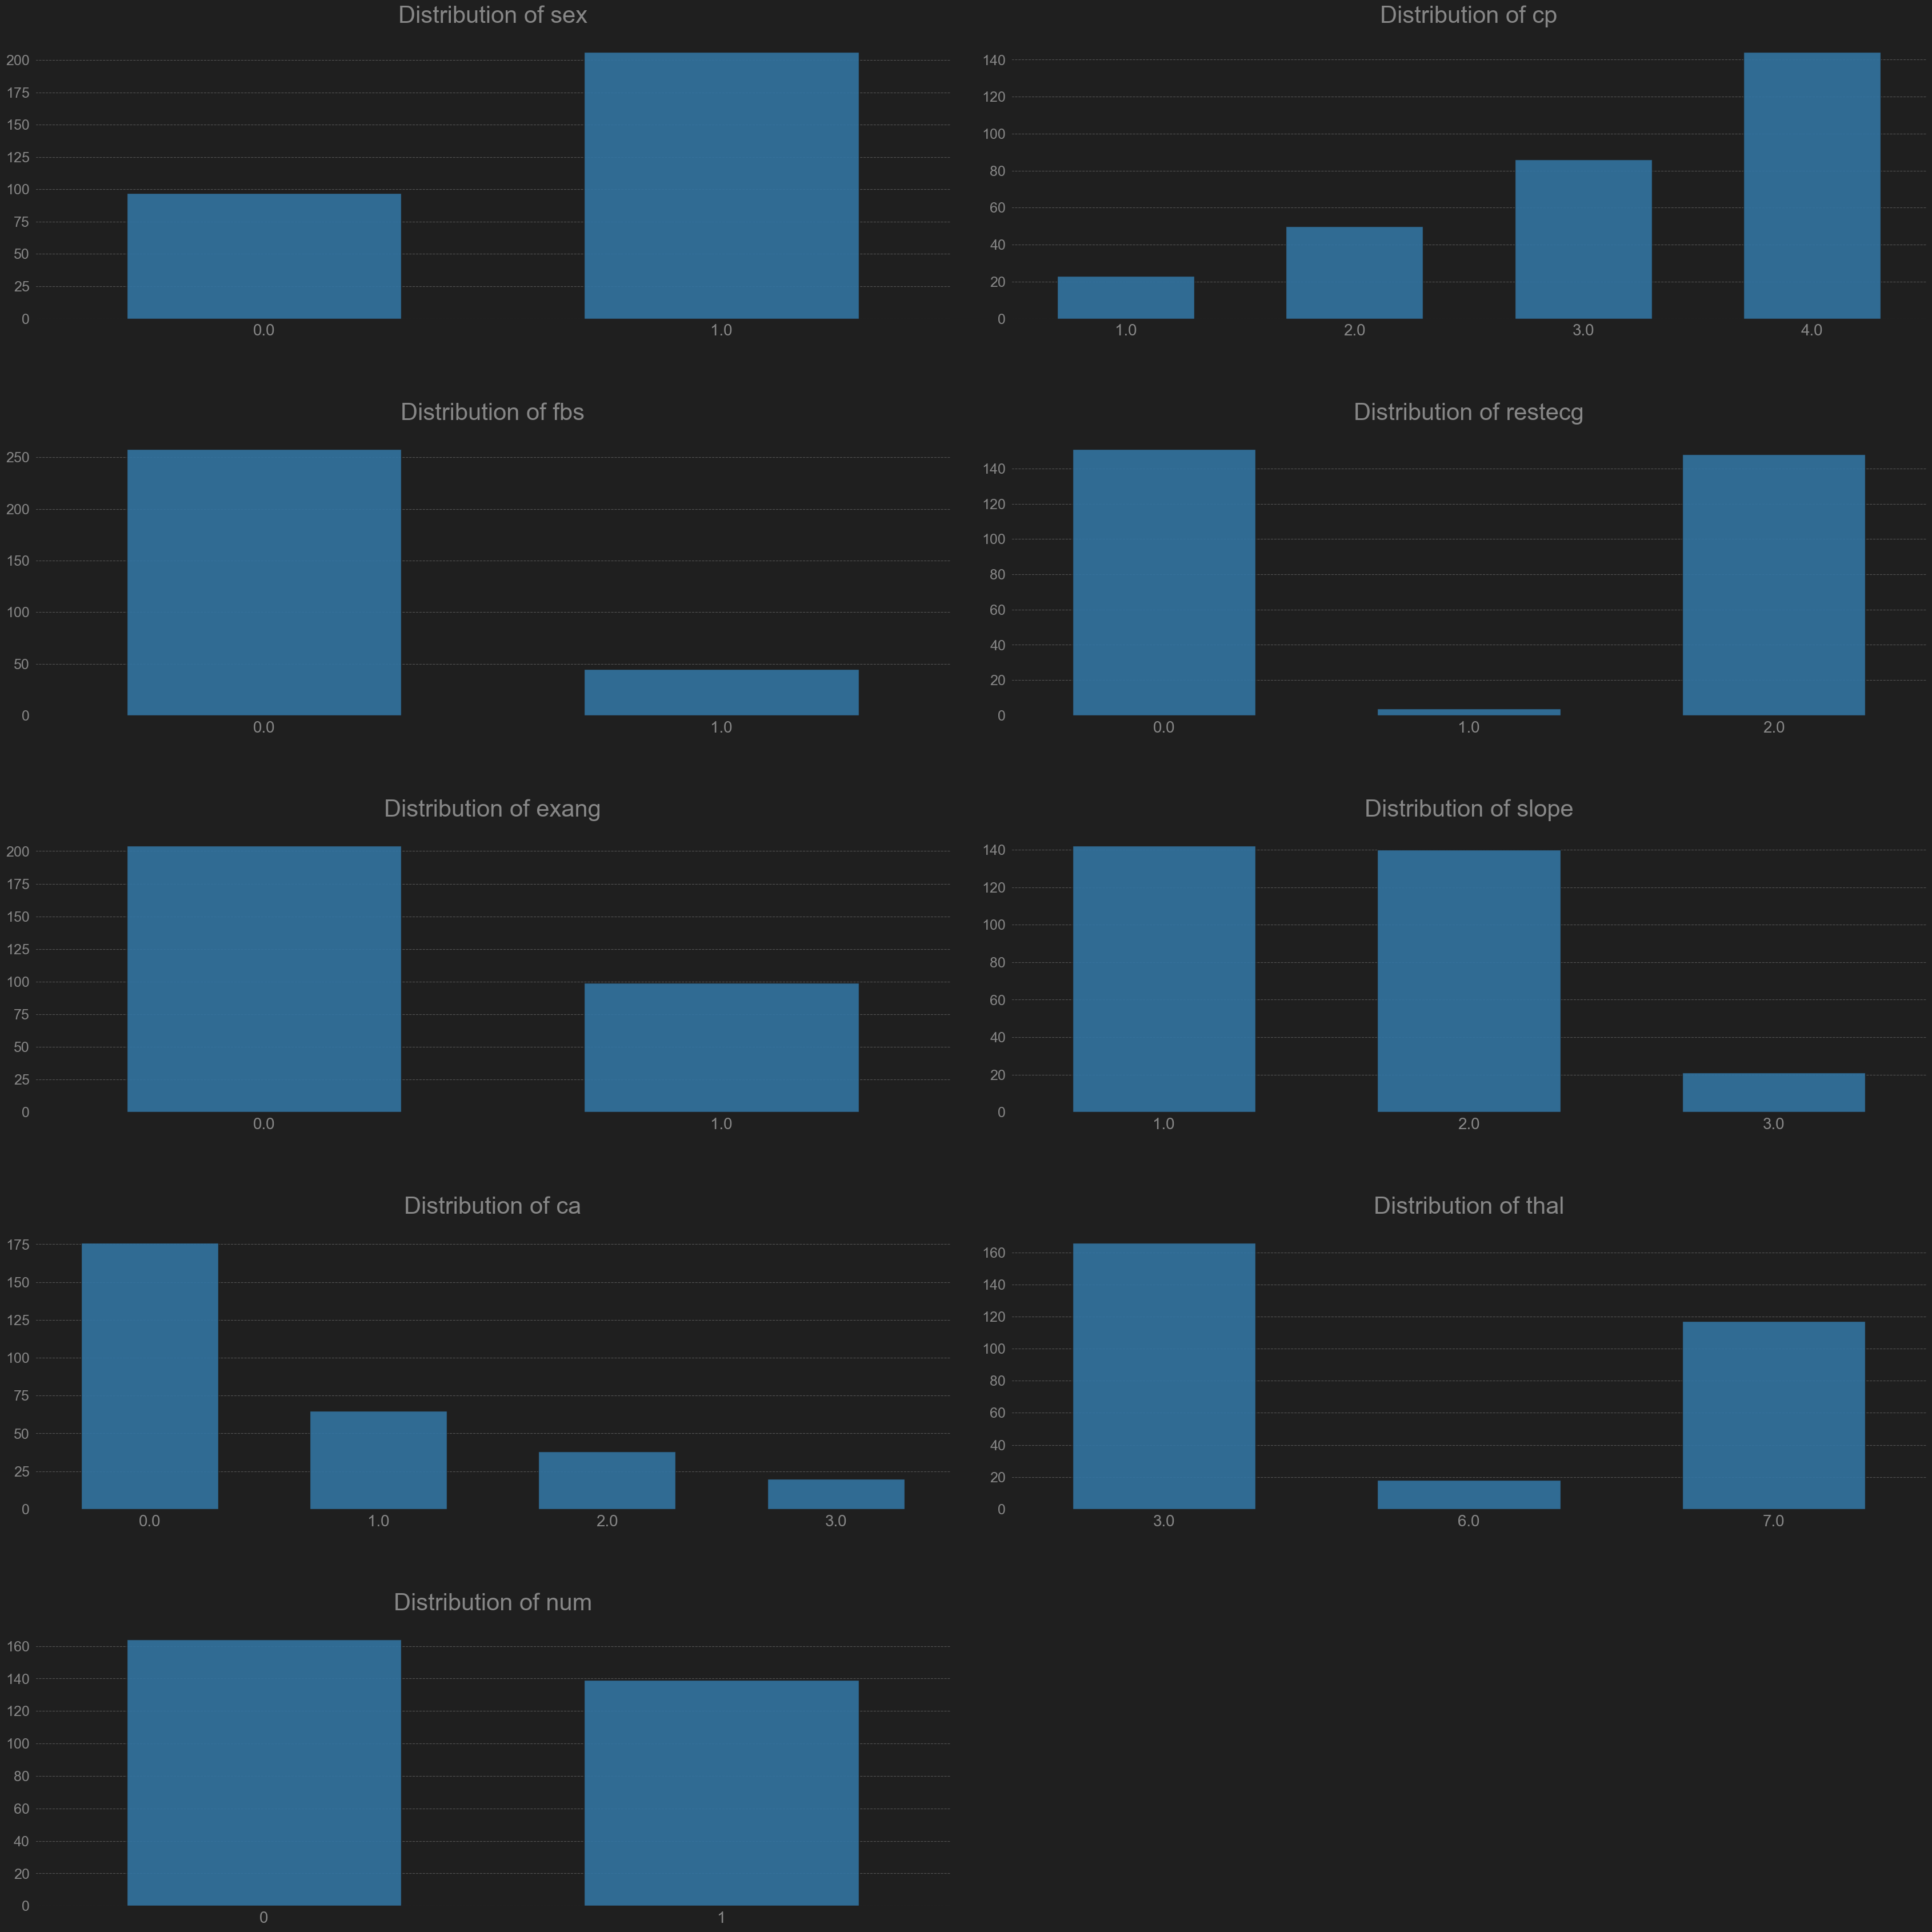

In [93]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "num"]

# Number of plots = number of categorical columns
n_cols = len(categorical_cols)
n_rows = math.ceil(n_cols / 2)  # Two plots per row

# Create subplots grid
fig, axes = plt.subplots(n_rows, 2, figsize=(35, n_rows * 7))
axes = axes.flatten()

# Loop over each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(
        x=col,
        data=df,
        ax=axes[i],
        color=PRIMARY_COLOR,
        edgecolor=EDGE_COLOR,
        alpha=0.9,
        width=0.6
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=30, pad=20)
    axes[i].set_xlabel("")  # hide x-axis label
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].set_ylabel("")  # hide y-axis label
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove any empty subplots (in case of odd number of categorical columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=8.0)
plt.show()


#### **Correlation Heatmaps**

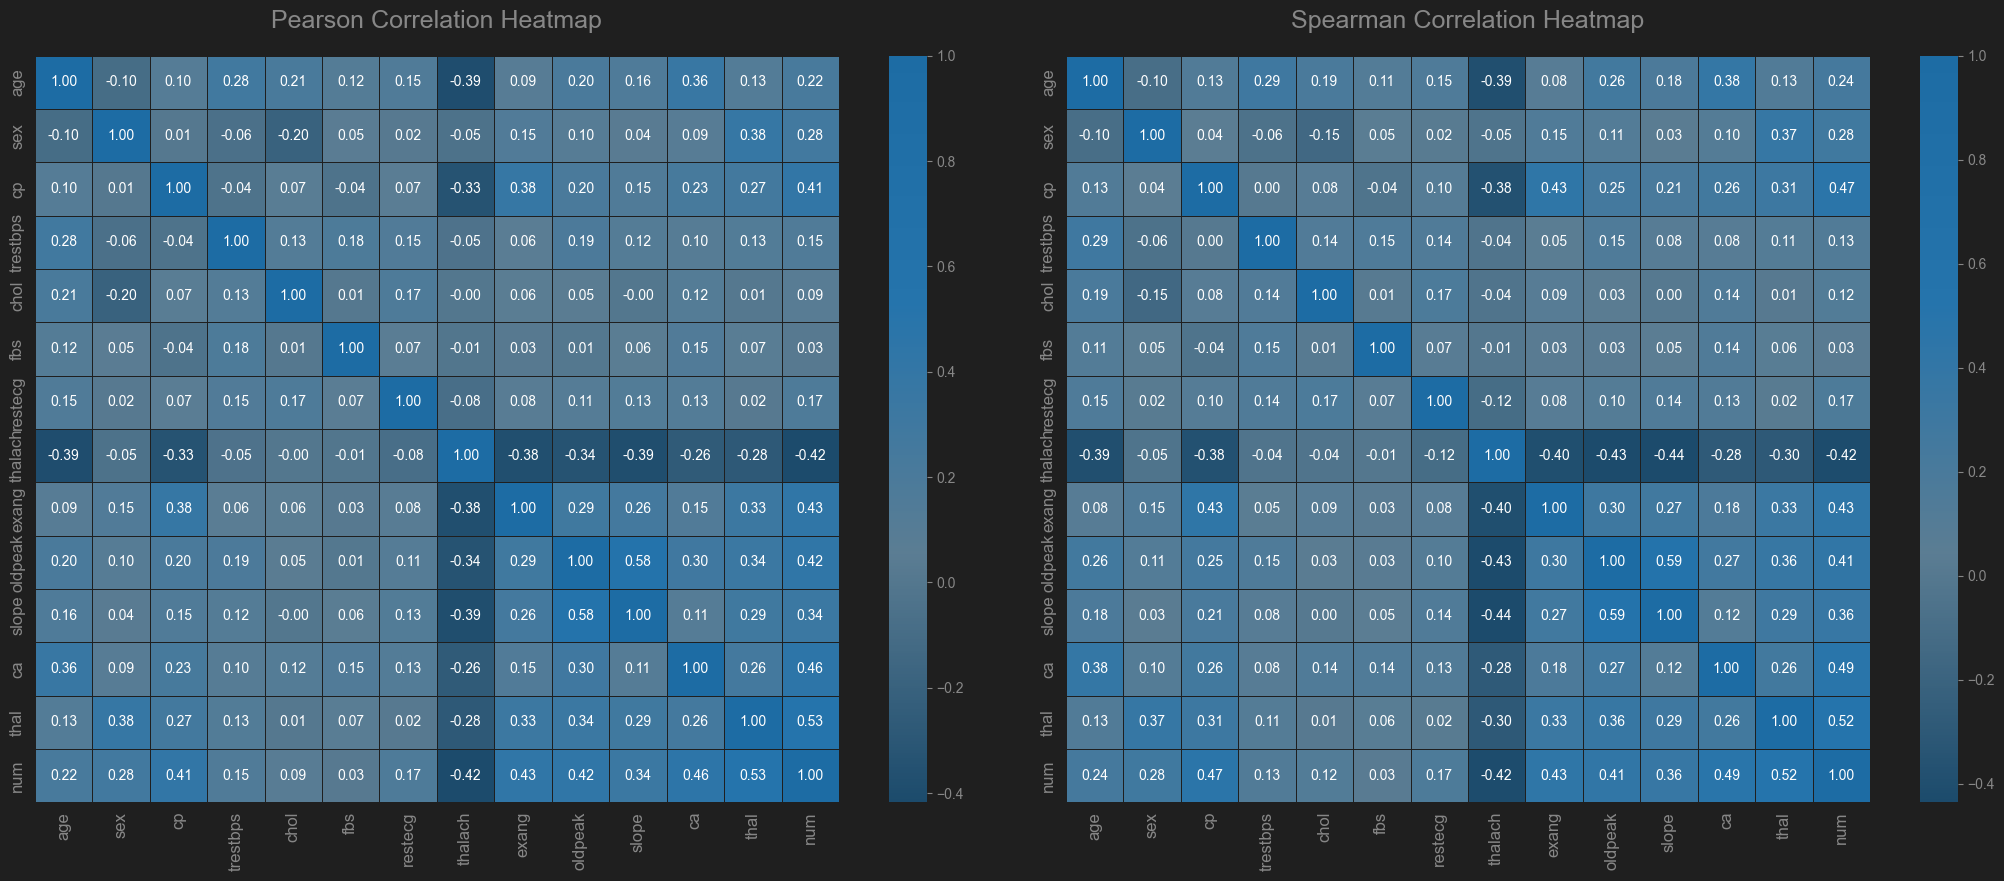

In [94]:
# Compute correlations
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# Create a custom colormap with the specific hex colors
colors = ["#1C4B6C", "#5b7d93", "#2574ac", "#1D6CA4"]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=256)

# Pearson Heatmap
sns.heatmap(
    pearson_corr,
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor=EDGE_COLOR,
    cbar=True,
    ax=axes[0],
    annot_kws={"size": 10, "color": "#ffffff"}
)
axes[0].set_title("Pearson Correlation Heatmap", fontsize=18, pad=20)

# Spearman Heatmap
sns.heatmap(
    spearman_corr,
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor=EDGE_COLOR,
    cbar=True,
    ax=axes[1],
    annot_kws={"size": 10, "color": "#ffffff"}
)
axes[1].set_title("Spearman Correlation Heatmap", fontsize=18, pad=20)

# Apply background color
for ax in axes:
    ax.set_facecolor(BACKGROUND_COLOR)
    ax.tick_params(colors=GRID_TEXT_COLOR, labelsize=12)

fig.patch.set_facecolor(BACKGROUND_COLOR)  # overall background
plt.tight_layout(pad=5.0, w_pad=3.0, h_pad=5.0)
plt.show()


#### **Boxplots for outlier analysis (Interactive plots)**

In [95]:
# Set theme
fig_config = {
    'plot_bgcolor': "rgba(0,0,0,0)",   # Transparent plot area
    'paper_bgcolor': "rgba(0,0,0,0)",  # Transparent figure background
    'font': {'color': GRID_TEXT_COLOR, 'size': 12},
    'title': {'x': 0.5, 'xanchor': 'center', 'font': {'size': 16}},
    'height': 400
}

# Loop through numerical columns and create boxplots
for col in numerical_cols:
    fig = px.box(df, 
                 x=col, 
                 title=f'Distribution of {col} with Outliers',
                 color_discrete_sequence=[PRIMARY_COLOR], 
                 points='outliers')  
    
    # Apply styling
    fig.update_layout(**fig_config)
    fig.update_traces(marker=dict(size=9), line=dict(width=2))
    fig.update_xaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=EDGE_COLOR)
    
    fig.show()


#### **Data Preprocessing & Cleaning**

In [96]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


##### **Impute 'ca', and 'thal' columns with its MODE**

In [97]:
# .mode() returns a Series. We take the first value in case there's a tie.
ca_mode = df['ca'].mode()[0]

print(f"\nThe most frequent value for 'ca' (number of vessels) is: {ca_mode}")

df['ca'] = df['ca'].fillna(ca_mode)


thal_mode = df['thal'].mode()[0]

print(f"\nThe most frequent value for 'thal' (thallium scan) is: {thal_mode}")

df['thal'] = df['thal'].fillna(thal_mode)


The most frequent value for 'ca' (number of vessels) is: 0.0

The most frequent value for 'thal' (thallium scan) is: 3.0


##### **Verify imputation was successful**

In [98]:
print("Missing values in each column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Total missing values: 0


##### **Define the correct data types for each column**

In [99]:
data_types = {
    'age': 'int64',
    'sex': 'category',
    'cp': 'category',
    'trestbps': 'int64',
    'chol': 'int64',
    'fbs': 'category',
    'restecg': 'category',
    'thalach': 'int64',
    'exang': 'category',
    'oldpeak': 'float64',
    'slope': 'category',
    'ca': 'category',
    'thal': 'category',
    'num': 'int64'
}

df = df.astype(data_types)

# Verify the new data types
print("\n--- DataFrame with Correct Data Types ---")
print(df.dtypes)


--- DataFrame with Correct Data Types ---
age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
num            int64
dtype: object


##### **Data encoding**

In [100]:
# Define the list of nominal categorical features to encode
nominal_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Check the unique values for each categorical feature
for feature in nominal_features:
    unique_vals = df[feature].astype(int).unique()
    print(f"{feature}: {unique_vals}")

sex: [1 0]
cp: [1 4 3 2]
fbs: [1 0]
restecg: [2 0 1]
exang: [0 1]
slope: [3 2 1]
thal: [6 3 7]


In [101]:
# Apply one-hot encoding to the specified nominal features
df = pd.get_dummies(df, columns=nominal_features, drop_first=True, prefix=nominal_features, dtype=int)

# Ordinal categories are already numbers but need to be Converted from 'category' to 'int64'
df['ca'] = df['ca'].astype('int64')

In [102]:
# Check the new shape of the DataFrame
print("DataFrame shape:", df.shape)

# Check the new column names
print("\nNew column names:")
print(df.columns.tolist())

# Get a list of all columns that start with 'cp_' to see the encoding for chest pain as an example
cp_columns = [col for col in df.columns if col.startswith('cp_')]
df[cp_columns].head()

DataFrame shape: (303, 19)

New column names:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'thal_6.0', 'thal_7.0']


,cp_2.0,cp_3.0,cp_4.0
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


##### **Standardize numerical features using StandardScaler**

In [103]:
# Select only numerical columns
X_num = df[numerical_cols]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_nscaled = scaler.fit_transform(X_num)

# Convert back to DataFrame for readability
X_nscaled_df = pd.DataFrame(X_nscaled, columns=numerical_cols)

X_nscaled_df.head()

,age,trestbps,chol,thalach,oldpeak
0,0.948726,0.757525,-0.264900,0.017197,1.087338
1,1.392002,1.611220,0.760415,-1.821905,0.397182
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147
3,-1.932564,-0.096170,0.063974,1.637359,2.122573
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912


### **2.2 Dimensionality Reduction - PCA (Principal Component Analysis)**
Steps:
1. Apply PCA to reduce feature dimensionality while maintaining variance.
2. Determine the optimal number of principal components using the explained variance ratio.
3. Visualize PCA results using a scatter plot and cumulative variance plot.

Deliverable:
- PCA-transformed dataset
- Graph showing variance retained per component

#### **Step 1: Apply PCA**

We’ll apply PCA on your standardized numerical features.

In [104]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_nscaled_df)

# Create a DataFrame for PCA-transformed dataset
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.264242,-0.091594,0.777920,0.091672,0.711645
1,2.694890,0.363379,0.052324,-0.671431,-0.860806
2,1.538935,-1.227560,-0.525348,0.063151,0.984175
3,-0.954388,-0.108667,1.234460,2.862250,0.543482
4,-1.431709,-0.403985,1.012778,0.853656,-0.007242


#### **Step 2: Explained & cumulative Variance Ratio**

This tells us how much variance each component retains and what the optimal number of principal components is.

In [105]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()

# Set desired threshold for cumulative variance
threshold = 0.95

# Find the number of components needed to reach this threshold
optimal_pc = np.argmax(cumulative_var_ratio >= threshold) + 1

print(f"Optimal number of principal components: {optimal_pc}")

# Display ratios
pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_var_ratio))],
    "Explained Variance": explained_var_ratio,
    "Cumulative Variance": cumulative_var_ratio
})

Optimal number of principal components: 5


,Principal Component,Explained Variance,Cumulative Variance
0,PC1,0.359439,0.359439
1,PC2,0.218241,0.577680
2,PC3,0.174924,0.752604
3,PC4,0.152548,0.905152
4,PC5,0.094848,1.000000


We found that the optimal number of principal components is 5. Because there were only 5 original numerical features, no dimensionality reduction was achieved.

#### **Step 3: Visualization**

We’ll plot both individual variance per PC and cumulative variance.

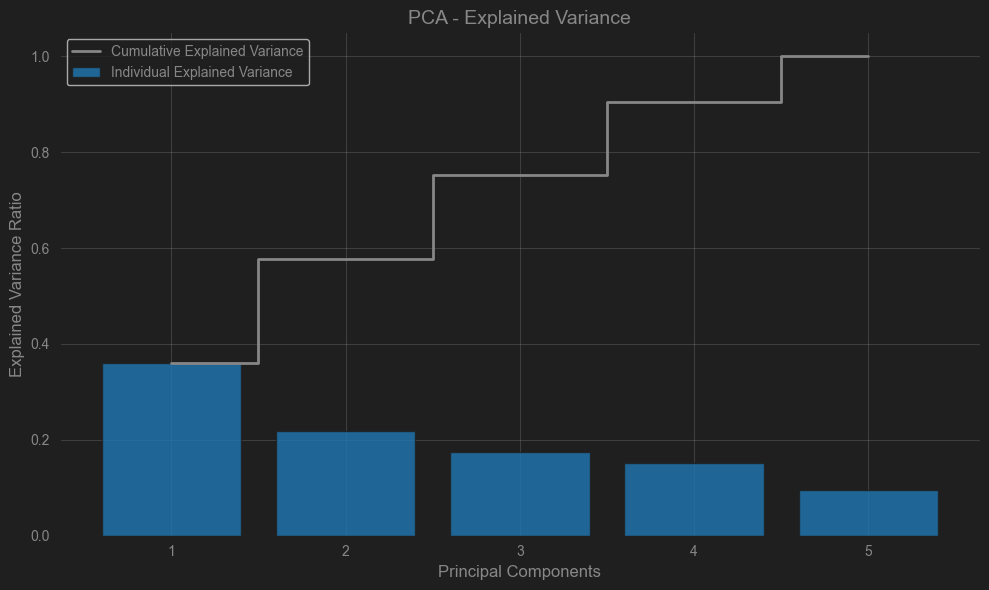

In [106]:
plt.figure(figsize=(10, 6))

# Individual variance
plt.bar(
    range(1, len(explained_var_ratio) + 1),
    explained_var_ratio,
    alpha=0.8,
    color=PRIMARY_COLOR,
    edgecolor=EDGE_COLOR,
    label="Individual Explained Variance"
)

# Cumulative variance
plt.step(
    range(1, len(cumulative_var_ratio) + 1),
    cumulative_var_ratio,
    where='mid',
    color=GRID_TEXT_COLOR,
    linewidth=2,
    label="Cumulative Explained Variance"
)

plt.xlabel("Principal Components", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.title("PCA - Explained Variance", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### **Step 4: Scatter Plot (First 2 PCs)**

For visualization in 2D:

In [107]:
fig = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    title="PCA - First Two Components",
    color_discrete_sequence=[PRIMARY_COLOR]
)

# Styling
fig.update_layout(
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    font=dict(color=GRID_TEXT_COLOR, size=12),
    title=dict(x=0.5, xanchor='center'),
)
fig.update_traces(marker=dict(size=8, line=dict(width=1, color=EDGE_COLOR)))
fig.update_xaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=GRID_TEXT_COLOR)
fig.update_yaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=GRID_TEXT_COLOR)

fig.show()


### **2.3 Feature Selection**
Steps:
1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.
2. Apply Recursive Feature Elimination (RFE) to select the best predictors.
3. Use Chi-Square Test to check feature significance.
4. Select only the most relevant features for modeling.

Deliverable:
- Reduced dataset with selected key features
- Feature importance ranking visualization

#### **Prepare Features and Target Column**

In [108]:
# Define target column
target_col = "num"

y = df[target_col] # The target column
X = df.drop(columns=[target_col]) # The Original dataset without the target column

# Check results
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (303, 18)
y shape: (303,)


,age,trestbps,chol,thalach,oldpeak,ca,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67,160,286,108,1.5,3,1,0,0,1,0,0,1,1,1,0,0,0
2,67,120,229,129,2.6,2,1,0,0,1,0,0,1,1,1,0,0,1
3,37,130,250,187,3.5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41,130,204,172,1.4,0,0,1,0,0,0,0,1,0,0,0,0,0


##### **Step 1: Feature Importance (Random Forest)**

Random Forest can tell you which features contribute most to predicting the target.

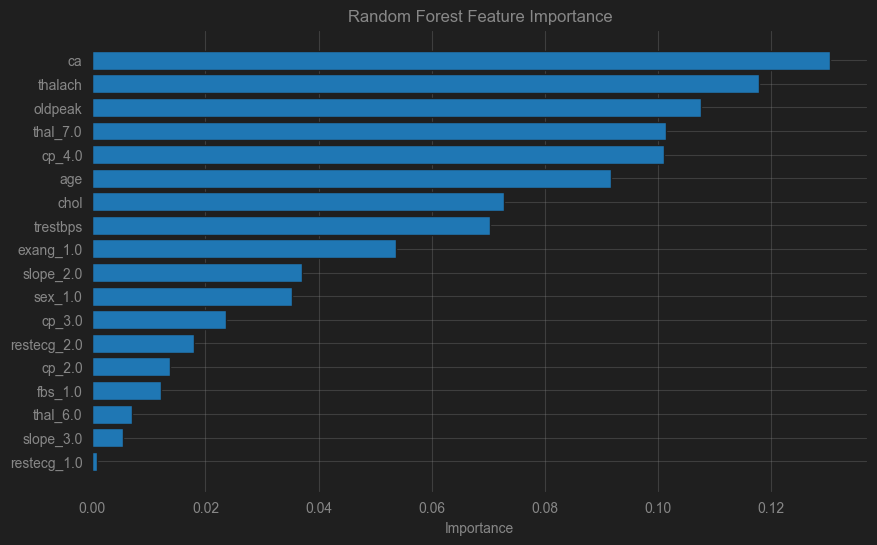

In [109]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color=PRIMARY_COLOR, edgecolor=EDGE_COLOR)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

##### **Step 2: Recursive Feature Elimination (RFE)**

RFE iteratively removes the least important feature until the desired number of features is reached.

In [110]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=8)  # We can change the number of features if we want
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))

Selected features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_7.0']


##### **Step 3: Chi-Square Test (for categorical features / classification)**

Chi-Square tests association between each feature and the target.

In [111]:
chi_scores, p_values = chi2(X, y)

chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

chi_df

,Feature,Chi2 Score,p-value
3,thalach,183.821471,7.097172e-42
5,ca,84.115181,4.667726e-20
4,oldpeak,70.572550,4.436474e-17
17,thal_7.0,42.958360,5.591745e-11
9,cp_4.0,42.410097,7.400700e-11
13,exang_1.0,38.052613,6.886243e-10
2,chol,23.802935,1.067196e-06
0,age,22.562319,2.034358e-06
8,cp_3.0,21.551109,3.445235e-06
14,slope_2.0,20.624160,5.588639e-06


##### **Step 4: Select the most relevant features**

Combine results from Feature Importance, RFE, and Chi-Square test to choose key features.

In [112]:
top_features = list(set(selected_features) & set(feature_importances['Feature'][:10]) & set(chi_df['Feature'][:10]))
X_reduced = X[top_features]

print(top_features)
print("Reduced dataset shape:", X_reduced.shape)

['thalach', 'ca', 'oldpeak', 'chol', 'cp_4.0', 'thal_7.0', 'age']
Reduced dataset shape: (303, 7)


### **2.4 Supervised Learning - Classification Models**
Steps:
1. Split the dataset into training (80%) and testing (20%) sets.
2. Train the following models:
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - Support Vector Machine (SVM)
3. Evaluate models using:
    - Accuracy, Precision, Recall, F1-score
    - ROC Curve & AUC Score

Deliverable:
Trained models with performance metrics

#### **Step 1: Train Models**

Initializing the models and splitting the data

In [113]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(
        C=0.01, solver="saga", penalty="l2", class_weight=None, max_iter=1000
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=None, min_samples_split=5, min_samples_leaf=2,
        criterion="gini", class_weight=None, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=8, min_samples_split=2,
        min_samples_leaf=2, max_features="log2", bootstrap=False,
        class_weight=None, random_state=42
    ),
    "SVM": SVC(
        C=1, kernel="rbf", gamma=0.1, probability=True,
        class_weight="balanced", random_state=42
    )
}

# Fit models (scaled for LR & SVM, raw for tree-based models)
fitted_models = {
    "Logistic Regression": models["Logistic Regression"].fit(X_train_scaled, y_train),
    "Decision Tree": models["Decision Tree"].fit(X_train, y_train),
    "Random Forest": models["Random Forest"].fit(X_train, y_train),
    "SVM": models["SVM"].fit(X_train_scaled, y_train),
}

#### **Step 2: Evaluate Models**

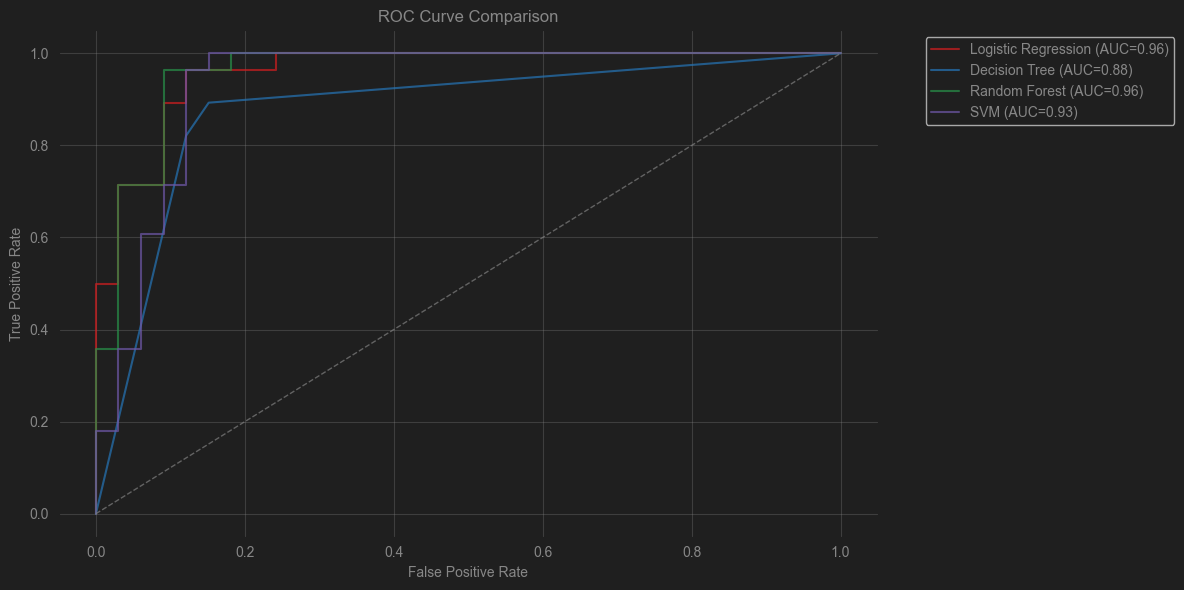

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.901639,0.866667,0.928571,0.896552,0.959957
1,Decision Tree,0.852459,0.851852,0.821429,0.836364,0.878788
2,Random Forest,0.934426,0.900000,0.964286,0.931034,0.959957
3,SVM,0.918033,0.870968,0.964286,0.915254,0.933983


In [114]:
# Color palette: one base color per model
palette = {
    "Logistic Regression": sns.color_palette("Reds", n_colors=10),
    "Decision Tree": sns.color_palette("Blues", n_colors=10),
    "Random Forest": sns.color_palette("Greens", n_colors=10),
    "SVM": sns.color_palette("Purples", n_colors=10),
}

results = []

plt.figure(figsize=(12,6))

for name, model in fitted_models.items():
    if name in ["Logistic Regression", "SVM"]:
        X_eval = X_test_scaled
    else:
        X_eval = X_test

    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)

    # Collect metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # For binary classification, use probabilities for the positive class (index 1)
    auc = roc_auc_score(y_test, y_prob[:, 1])

    results.append([name, acc, prec, rec, f1, auc])

    # ROC curve for binary classification
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    plt.plot(fpr, tpr, 
             color=palette[name][7],
             alpha=0.7,
             label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1], color='gray', linestyle="--", linewidth=1, alpha=0.7)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-score","AUC"])
results_df

In [115]:
# Rank models by multiple metrics
results_df["Score"] = (
    0.25 * results_df["Accuracy"] +
    0.25 * results_df["Precision"] +
    0.25 * results_df["Recall"] +
    0.25 * results_df["F1-score"]
)

# Find the best model (by Score, or AUC)
best_row = results_df.sort_values(by=["Score", "AUC"], ascending=False).iloc[0]
best_model_name = best_row["Model"]

print(f"Best Model Selected: {best_model_name}")

Best Model Selected: Random Forest


##### **Confusion Matrices:**

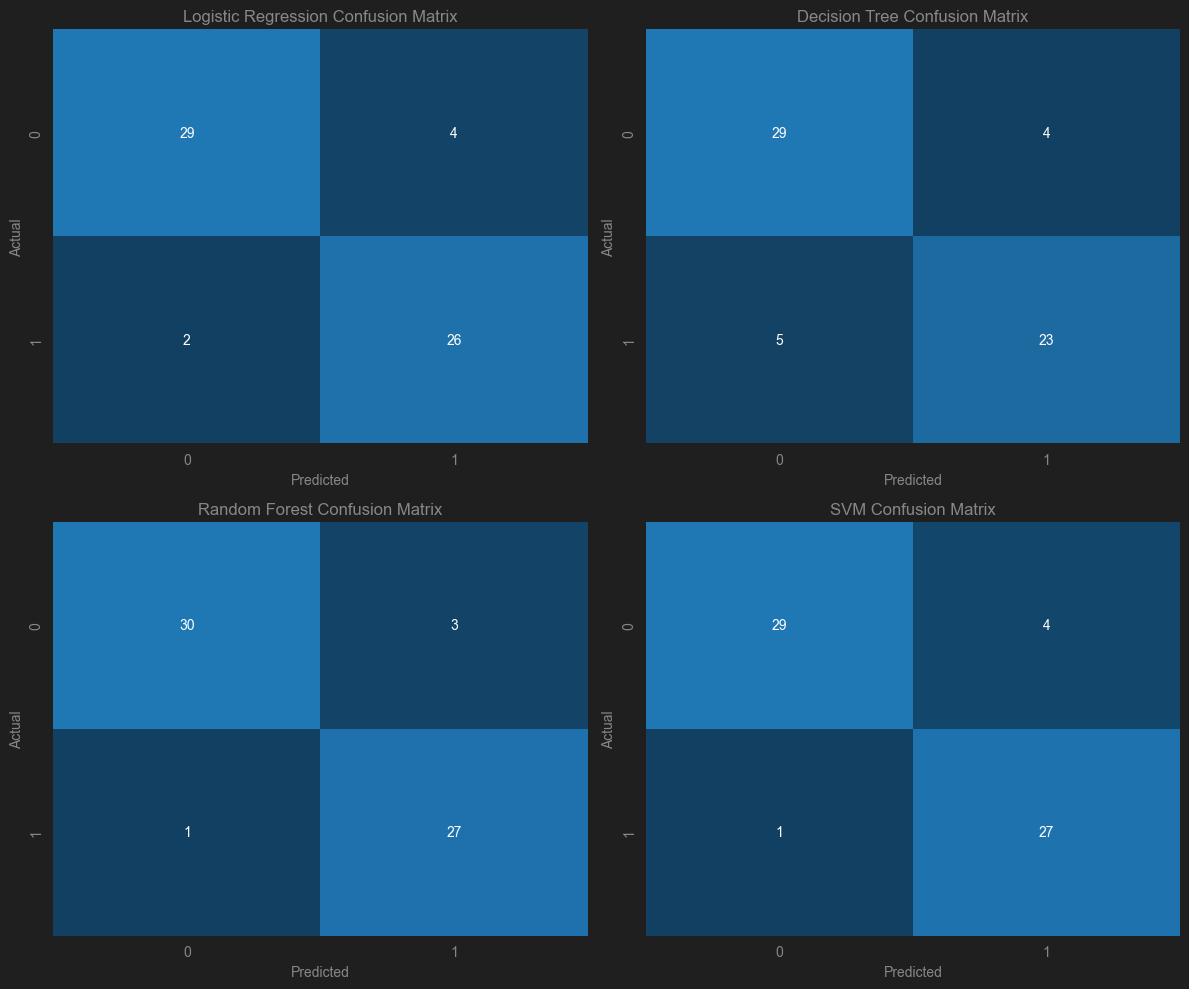

In [116]:
X_test_dict = {
    "Logistic Regression": X_test_scaled,
    "SVM": X_test_scaled,
    "Decision Tree": X_test,
    "Random Forest": X_test
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

colors = [SECONDARY_COLOR, PRIMARY_COLOR]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=256)

for idx, (name, model) in enumerate(fitted_models.items()):
    y_pred = model.predict(X_test_dict[name])
    
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, cbar=False,
                ax=axes[idx], xticklabels=model.classes_, yticklabels=model.classes_)
    
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


### **2.5 Unsupervised Learning - Clustering**
Steps:
1. Apply K-Means Clustering (elbow method, and Silhouette Scores to determine K).
2. Perform Hierarchical Clustering (dendrogram analysis).
3. Compare clusters with actual disease labels.

Deliverable: Clustering models with visualized results

#### **K-Means Clustering**

In [117]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method (WCSS) and Silhouette Analysis
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Determine optimal k using KneeLocator for elbow method
knee = KneeLocator(K, wcss, curve="convex", direction="decreasing")
optimal_k_elbow = knee.knee

# Determine optimal k based on silhouette score
optimal_k_silhouette = K[np.argmax(silhouette_scores)]

# Create subplot figure (1 row, 2 cols)
fig = make_subplots(
    rows=1, 
    cols=2, 
    subplot_titles=("Elbow Method for Optimal K", "Silhouette Scores for Optimal K")
)

# --- Plot 1: Elbow Method ---
fig.add_trace(
    go.Scatter(
        x=list(K),
        y=wcss,
        mode="lines+markers",
        line=dict(color=PRIMARY_COLOR, width=2),
        marker=dict(color=PRIMARY_COLOR, size=8),
        name="WCSS"
    ),
    row=1, col=1
)

# --- Plot 2: Silhouette Scores ---
fig.add_trace(
    go.Scatter(
        x=list(K),
        y=silhouette_scores,
        mode="lines+markers",
        line=dict(color=PRIMARY_COLOR, width=2),
        marker=dict(color=PRIMARY_COLOR, size=8),
        name="Silhouette Score"
    ),
    row=1, col=2
)

# Layout
fig.update_layout(
    title_text="K-Means Clustering Analysis",
    title_x=0.5,
    title=dict(x=0.5, xanchor='center'),
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    font=dict(color=GRID_TEXT_COLOR, size=12),
    height=500,
    width=1200,
    showlegend=False
)

fig.update_xaxes(title_text="Number of Clusters (K)", gridcolor='grey', zerolinecolor=GRID_TEXT_COLOR, row=1, col=1)
fig.update_yaxes(title_text="Within-Cluster Sum of Squares (WCSS)", gridcolor='grey', zerolinecolor=GRID_TEXT_COLOR, row=1, col=1)
fig.update_xaxes(title_text="Number of Clusters (K)", gridcolor='grey', zerolinecolor=GRID_TEXT_COLOR, row=1, col=2)
fig.update_yaxes(title_text="Silhouette Score", gridcolor='grey', zerolinecolor=GRID_TEXT_COLOR, row=1, col=2)

fig.show()

print(f"Optimal number of clusters based on elbow method (KneeLocator): k = {optimal_k_elbow}")
print(f"Optimal number of clusters based on silhouette score: k = {optimal_k_silhouette}")

# Decide which optimal k to use
# Silhouette score is generally more reliable, but we can compare
if optimal_k_elbow == optimal_k_silhouette:
    print("Both methods agree on the optimal number of clusters ✓")
    final_optimal_k = optimal_k_silhouette
else:
    print("Methods disagree. Silhouette score is generally more reliable for clustering.")
    print("Consider examining both solutions or prioritizing silhouette score.")
    final_optimal_k = optimal_k_silhouette  # Default to silhouette score

print("But I will use k=2 in the end. 😁")

# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

Optimal number of clusters based on elbow method (KneeLocator): k = 8
Optimal number of clusters based on silhouette score: k = 8
Both methods agree on the optimal number of clusters ✓
But I will use k=2 in the end. 😁


#### **Hierarchical Clustering**

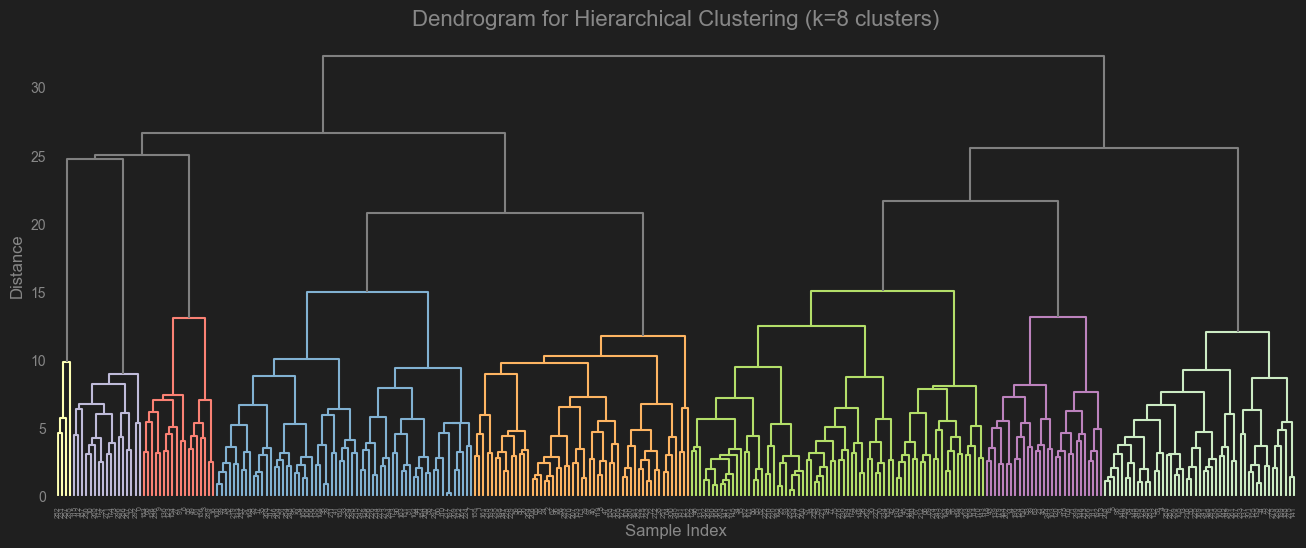


Hierarchical Clustering Results:
-----------------------------------
Cluster 0: 155 samples
Cluster 1: 148 samples


In [118]:
# Create dendrogram with colored clusters
plt.figure(figsize=(16, 6))
linked = linkage(X_scaled, method='ward')

# Create dendrogram with colored clusters
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=True,
           color_threshold=linked[-(final_optimal_k-1), 2],  # Set threshold to get k clusters
           above_threshold_color='grey')  # Color for non-clustered parts

plt.title(f'Dendrogram for Hierarchical Clustering (k={final_optimal_k} clusters)', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(False)
plt.show()

# Apply hierarchical clustering with optimal k
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Print cluster sizes
unique, counts = np.unique(hierarchical_labels, return_counts=True)
print("\nHierarchical Clustering Results:")
print("-" * 35)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} samples")

#### **Compare with Actual Labels**

In [119]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fix cluster label alignment (swap if needed to match actual labels)
def align_cluster_labels(true_labels, cluster_labels):
    # Create a mapping to align clusters with true labels
    crosstab = pd.crosstab(true_labels, cluster_labels)
    
    # Find which cluster has majority of disease cases
    disease_cluster = crosstab.loc[1].idxmax() if 1 in crosstab.index else 0
    
    # Create mapping: if disease_cluster is 1, no swap needed; if 0, swap labels
    if disease_cluster == 0:
        # Swap labels: 0->1, 1->0
        aligned_labels = np.where(cluster_labels == 0, 1, 0)
    else:
        aligned_labels = cluster_labels.copy()
    
    return aligned_labels

# Align both clustering methods with actual labels
kmeans_labels_aligned = align_cluster_labels(y, kmeans_labels)
hierarchical_labels_aligned = align_cluster_labels(y, hierarchical_labels)

# Create subplot figure (2 rows, 2 cols)
fig = make_subplots(
    rows=2, 
    cols=2,
    subplot_titles=(
        f"K-Means Clustering (k={2})",
        f"Hierarchical Clustering (k={2})",
        "Actual Disease Labels",
        "Comparison with True Labels"
    ),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Define color mapping for consistent visualization
color_map = {0: PRIMARY_COLOR, 1: SECONDARY_COLOR}

# --- Plot 1: K-Means clusters ---
fig.add_trace(
    go.Scatter(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        mode="markers",
        marker=dict(
            color=[color_map[label] for label in kmeans_labels_aligned],
            size=8,
            opacity=0.8,
            line=dict(width=1, color=EDGE_COLOR)
        ),
        name="K-Means Clusters",
        showlegend=False
    ),
    row=1, col=1
)

# --- Plot 2: Hierarchical clusters ---
fig.add_trace(
    go.Scatter(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        mode="markers",
        marker=dict(
            color=[color_map[label] for label in hierarchical_labels_aligned],
            size=8,
            opacity=0.8,
            line=dict(width=1, color=EDGE_COLOR)
        ),
        name="Hierarchical Clusters",
        showlegend=False
    ),
    row=1, col=2
)

# --- Plot 3: Actual disease labels ---
fig.add_trace(
    go.Scatter(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        mode="markers",
        marker=dict(
            color=[color_map[label] for label in y],
            size=8,
            opacity=0.8,
            line=dict(width=1, color=EDGE_COLOR)
        ),
        name="Actual Labels",
        showlegend=False
    ),
    row=2, col=1
)

# --- Plot 4: Comparison metrics ---
metrics = ['Adjusted Rand Index', 'Normalized Mutual Info']
kmeans_scores = [
    adjusted_rand_score(y, kmeans_labels_aligned),
    normalized_mutual_info_score(y, kmeans_labels_aligned)
]
hierarchical_scores = [
    adjusted_rand_score(y, hierarchical_labels_aligned),
    normalized_mutual_info_score(y, hierarchical_labels_aligned)
]

fig.add_trace(
    go.Bar(
        x=metrics,
        y=kmeans_scores,
        name='K-Means',
        marker_color=PRIMARY_COLOR,
        opacity=0.8
    ),
    row=2, col=2
)

fig.add_trace(
    go.Bar(
        x=metrics,
        y=hierarchical_scores,
        name='Hierarchical',
        marker_color=SECONDARY_COLOR,
        opacity=0.8
    ),
    row=2, col=2
)

# Add legend items separately with better positioning
fig.add_trace(
    go.Scatter(
        x=[None], y=[None],
        mode="markers",
        marker=dict(color=PRIMARY_COLOR, size=12, line=dict(width=1, color=EDGE_COLOR)),
        name="No Disease (0)",
        showlegend=True
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=[None], y=[None],
        mode="markers",
        marker=dict(color=SECONDARY_COLOR, size=12, line=dict(width=1, color=EDGE_COLOR)),
        name="Disease (1)",
        showlegend=True
    ),
    row=1, col=1
)

# Layout
fig.update_layout(
    title_text="Cluster Visualization and Comparison",
    title_x=0.5,
    title=dict(x=0.5, xanchor='center', font=dict(size=16)),
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    font=dict(color=GRID_TEXT_COLOR, size=12),
    height=900,
    width=1200,
    showlegend=True,
    legend=dict(
        x=1.02,
        y=0.5,
        xanchor='left',
        yanchor='middle',
        bgcolor='rgba(255, 255, 255, 0)',  # Fully transparent
        bordercolor='rgba(255, 255, 255, 0)',  # Fully transparent border
        borderwidth=0
    )
)

# Update axes labels with grey grid
fig.update_xaxes(title_text="PCA Component 1", row=1, col=1, gridcolor='grey', zerolinecolor='grey')
fig.update_yaxes(title_text="PCA Component 2", row=1, col=1, gridcolor='grey', zerolinecolor='grey')
fig.update_xaxes(title_text="PCA Component 1", row=1, col=2, gridcolor='grey', zerolinecolor='grey')
fig.update_yaxes(title_text="PCA Component 2", row=1, col=2, gridcolor='grey', zerolinecolor='grey')
fig.update_xaxes(title_text="PCA Component 1", row=2, col=1, gridcolor='grey', zerolinecolor='grey')
fig.update_yaxes(title_text="PCA Component 2", row=2, col=1, gridcolor='grey', zerolinecolor='grey')
fig.update_xaxes(title_text="Metrics", row=2, col=2, gridcolor='grey', zerolinecolor='grey')
fig.update_yaxes(title_text="Score", row=2, col=2, gridcolor='grey', zerolinecolor='grey', range=[0, 1])

fig.show()

# Create comparison DataFrame with aligned labels
comparison_aligned = pd.DataFrame({
    "Actual": y.reset_index(drop=True),
    "KMeans": kmeans_labels_aligned,
    "Hierarchical": hierarchical_labels_aligned
})

print("First 10 samples:")
display(comparison_aligned.head(10))

# Crosstab for evaluation with proper DataFrame formatting
print("\nK-Means vs Actual:")
kmeans_crosstab = pd.crosstab(comparison_aligned["Actual"], comparison_aligned["KMeans"])
kmeans_crosstab.columns = [f"Cluster {col}" for col in kmeans_crosstab.columns]
kmeans_crosstab.index = ["No Disease (0)", "Disease (1)"]
display(kmeans_crosstab)

print("\nHierarchical vs Actual:")
hc_crosstab = pd.crosstab(comparison_aligned["Actual"], comparison_aligned["Hierarchical"])
hc_crosstab.columns = [f"Cluster {col}" for col in hc_crosstab.columns]
hc_crosstab.index = ["No Disease (0)", "Disease (1)"]
display(hc_crosstab)

# Calculate alignment percentages
print("\nCluster Alignment with Disease Status:")
alignment_data = []
for method in ["KMeans", "Hierarchical"]:
    crosstab = pd.crosstab(comparison_aligned["Actual"], comparison_aligned[method])
    total_aligned = crosstab.iloc[0, 0] + crosstab.iloc[1, 1]  # Sum of diagonal
    alignment_percent = (total_aligned / len(comparison_aligned)) * 100
    alignment_data.append([method, f"{alignment_percent:.1f}%"])

alignment_df = pd.DataFrame(alignment_data, columns=["Method", "Alignment with Disease"])
display(alignment_df)

First 10 samples:


,Actual,KMeans,Hierarchical
0,0,1,1
1,1,1,1
2,1,1,1
3,0,0,1
4,0,0,0
5,0,0,0
6,1,1,1
7,0,0,1
8,1,1,1
9,1,1,1



K-Means vs Actual:


,Cluster 0,Cluster 1
No Disease (0),133,31
Disease (1),29,110



Hierarchical vs Actual:


,Cluster 0,Cluster 1
No Disease (0),109,55
Disease (1),39,100



Cluster Alignment with Disease Status:


,Method,Alignment with Disease
0,KMeans,80.2%
1,Hierarchical,69.0%


#### **Key Metrics and Insights**

In [120]:
# Calculate evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hc_silhouette = silhouette_score(X_scaled, hierarchical_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
hc_ari = adjusted_rand_score(y, hierarchical_labels)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_labels)
hc_nmi = normalized_mutual_info_score(y, hierarchical_labels)

print("Clustering Performance Metrics:")
print("=" * 50)
print(f"{'Metric':<30} {'K-Means':<10} {'Hierarchical':<12}")
print("-" * 50)
print(f"{'Silhouette Score':<30} {kmeans_silhouette:<10.4f} {hc_silhouette:<12.4f}")
print(f"{'Adjusted Rand Index (ARI)':<30} {kmeans_ari:<10.4f} {hc_ari:<12.4f}")
print(f"{'Normalized Mutual Info (NMI)':<30} {kmeans_nmi:<10.4f} {hc_nmi:<12.4f}")
print("=" * 50)

# Interpretation guidelines
print("\nInterpretation Guidelines:")
print("- Silhouette Score: -1 to 1 (higher = better separation)")
print("- ARI: -1 to 1 (1 = perfect match, 0 = random)")
print("- NMI: 0 to 1 (1 = perfect correlation)")

# Analyze cluster characteristics with better formatting
print("\nCluster Analysis:")
print("=" * 50)
print(f"{'Cluster':<25} {'Samples':<10} {'Disease %':<12} {'Interpretation'}")
print("-" * 50)

for i in range(2):
    cluster_indices = np.where(kmeans_labels == i)[0]
    disease_count = y.iloc[cluster_indices].sum()
    disease_percentage = (disease_count / len(cluster_indices)) * 100
    interpretation = "Mostly Healthy" if disease_percentage < 30 else "Mostly Diseased" if disease_percentage > 70 else "Mixed"
    print(f"{'K-Means Cluster ' + str(i):<25} {len(cluster_indices):<10} {disease_percentage:<12.1f}% {interpretation}")

for i in range(2):
    cluster_indices = np.where(hierarchical_labels == i)[0]
    disease_count = y.iloc[cluster_indices].sum()
    disease_percentage = (disease_count / len(cluster_indices)) * 100
    interpretation = "Mostly Healthy" if disease_percentage < 30 else "Mostly Diseased" if disease_percentage > 70 else "Mixed"
    print(f"{'Hierarchical Cluster ' + str(i):<25} {len(cluster_indices):<10} {disease_percentage:<12.1f}% {interpretation}")

print("=" * 50)

# Additional insights
print("\nKey Insights:")
print(f"- K-Means shows {'better' if kmeans_silhouette > hc_silhouette else 'worse'} cluster separation (Silhouette)")
print(f"- K-Means has {'better' if kmeans_ari > hc_ari else 'worse'} alignment with true labels (ARI)")
print(f"- K-Means has {'better' if kmeans_nmi > hc_nmi else 'worse'} information sharing with true labels (NMI)")

# Check if clusters are meaningful
if kmeans_ari > 0.3 or hc_ari > 0.3:
    print("- Clusters show meaningful alignment with disease status")
elif kmeans_ari > 0.1 or hc_ari > 0.1:
    print("- Clusters show weak but detectable alignment with disease status")
else:
    print("- Clusters show minimal alignment with disease status (close to random)")

Clustering Performance Metrics:
Metric                         K-Means    Hierarchical
--------------------------------------------------
Silhouette Score               0.1453     0.1013      
Adjusted Rand Index (ARI)      0.3627     0.1412      
Normalized Mutual Info (NMI)   0.2802     0.1090      

Interpretation Guidelines:
- Silhouette Score: -1 to 1 (higher = better separation)
- ARI: -1 to 1 (1 = perfect match, 0 = random)
- NMI: 0 to 1 (1 = perfect correlation)

Cluster Analysis:
Cluster                   Samples    Disease %    Interpretation
--------------------------------------------------
K-Means Cluster 0         141        78.0        % Mostly Diseased
K-Means Cluster 1         162        17.9        % Mostly Healthy
Hierarchical Cluster 0    155        64.5        % Mixed
Hierarchical Cluster 1    148        26.4        % Mostly Healthy

Key Insights:
- K-Means shows better cluster separation (Silhouette)
- K-Means has better alignment with true labels (ARI)
- K-Means 

### **2.6 Hyperparameter Tuning**
Steps:
1. Use GridSearchCV & RandomizedSearchCV to optimize model hyperparameters.
2. Compare optimized models with baseline performance.

Deliverable: Best performing model with optimized hyperparameters

#### **Using RandomizedSearchCV for Random Forest and GridSearchCV for the Rest**

In [121]:
# --- Define parameter grids for each model ---
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2", "elasticnet", None],
        "solver": ["liblinear", "saga"],
        "class_weight": [None, "balanced"],
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4, 5],
        "criterion": ["gini", "entropy"],
        "class_weight": [None, "balanced"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300, 500],
        "max_depth": [None, 8, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4, 5],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
        "class_weight": [None, "balanced"]
    },
    "SVM": {
        "C": [0.01, 0.1, 1, 10, 100],
        "gamma": [0.01, 0.1, 1, "scale", "auto"],
        "kernel": ["linear", "rbf", "poly"],
        "class_weight": [None, "balanced"],
    }
}

# --- Run GridSearchCV / RandomizedSearchCV ---
best_models = {}
results_tuned = []

for name, model in fitted_models.items():
    print(f"🔎 Tuning {name}...")
    
    # Choose search strategy (Grid or Random)
    if name == "Random Forest":
        search = RandomizedSearchCV(
            model, param_distributions=param_grids[name], 
            n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
        )
    else:
        search = GridSearchCV(
            model, param_grid=param_grids[name],
            cv=5, scoring="accuracy", n_jobs=-1
        )
    
    # Scale for LR and SVM
    X_eval = X_train_scaled if name in ["Logistic Regression", "SVM"] else X_train
    search.fit(X_eval, y_train)
    
    best_models[name] = search.best_estimator_
    
    # Evaluate on test set
    X_test_eval = X_test_scaled if name in ["Logistic Regression", "SVM"] else X_test
    y_pred = best_models[name].predict(X_test_eval)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results_tuned.append([name, acc, prec, rec, f1, search.best_params_])

# --- Collect results ---
results_tuned_df = pd.DataFrame(
    results_tuned,
    columns=["Model","Accuracy","Precision","Recall","F1-score","Best Params"]
)

# Show full params without truncation
pd.set_option("display.max_colwidth", None)

results_tuned_df


🔎 Tuning Logistic Regression...
🔎 Tuning Decision Tree...
🔎 Tuning Random Forest...
🔎 Tuning SVM...


,Model,Accuracy,Precision,Recall,F1-score,Best Params
0,Logistic Regression,0.901639,0.903896,0.901639,0.901798,"{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}"
1,Decision Tree,0.852459,0.852441,0.852459,0.852219,"{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}"
2,Random Forest,0.934426,0.936647,0.934426,0.934532,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8, 'class_weight': None, 'bootstrap': False}"
3,SVM,0.901639,0.901639,0.901639,0.901639,"{'C': 0.01, 'class_weight': None, 'gamma': 0.01, 'kernel': 'linear'}"


#### **Classification Report for Random Forest**

In [122]:
from sklearn.metrics import classification_report

# --- Select best Random Forest model ---
best_rf = best_models["Random Forest"]

print("\nBest Model Selected: Random Forest")
print(best_rf)

# --- Predict on test set ---
y_pred_rf = best_rf.predict(X_test)

# --- Evaluation ---
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Best Model Selected: Random Forest
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       min_samples_leaf=2, random_state=42)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.90      0.96      0.93        28

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



### **Testing the Model**

In [123]:
columns_ = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca',
    'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0',
    'restecg_1.0', 'restecg_2.0', 'exang_1.0',
    'slope_2.0', 'slope_3.0', 'thal_6.0', 'thal_7.0'
]

# Example encoded input row
sample_input = [
    63,   # age
    145,  # trestbps
    273,  # chol
    130,  # thalach
    2.3,  # oldpeak
    0,    # ca
    1,    # sex
    0, 0, 0,  # cp one-hot
    1,          # fbs_1.0
    0, 0,       # restecg one-hot
    0,          # exang_1.0
    1, 0,       # slope one-hot
    0, 1        # thal one-hot
]

true_label = 1  # known label

# Convert to numpy array & reshape
sample_input = np.array(sample_input).reshape(1, -1)

# Predict with Random Forest
y_pred = fitted_models["Random Forest"].predict(sample_input)[0]
y_prob = fitted_models["Random Forest"].predict_proba(sample_input)[0][1]

print("Random Forest Prediction:")
print(f"  Predicted: {y_pred}, True: {true_label}")
print(f"  Probability of Heart Disease: {y_prob:.4f}")

Random Forest Prediction:
  Predicted: 1, True: 1
  Probability of Heart Disease: 0.6879


### **Exporting model as .pkl**

In [124]:
with open('classifier.pkl', 'wb') as file:
    pickle.dump(fitted_models["Random Forest"], file)